In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/home/saibeast/Downloads/data_stocks.csv')

In [3]:
data.size

20715532

In [4]:
data.shape

(41266, 502)

In [5]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [6]:
data.isna().sum()

DATE           0
SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
              ..
NYSE.XRX       0
NYSE.XYL       0
NYSE.YUM       0
NYSE.ZBH       0
NYSE.ZTS       0
Length: 502, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)

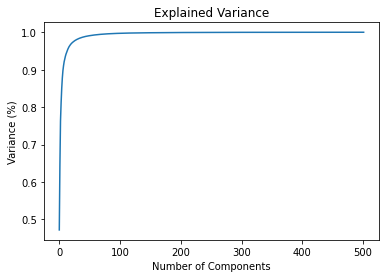

In [8]:
from sklearn.decomposition import PCA
import numpy as np
pca=PCA()
principalComponents = pca.fit_transform(data_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [9]:
pca=PCA(n_components=15)
data_redu=pca.fit_transform(data_scaled)


In [10]:
data_comp=pd.DataFrame(data=data_redu)
data_comp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25.647154,9.991542,-9.398347,-2.970993,-1.536428,-1.842704,-0.771186,-3.946011,4.124103,1.622701,1.450464,-0.583932,-2.721408,0.279053,-1.735397
1,25.744480,9.878093,-9.818745,-2.560079,-1.475362,-2.027779,-0.885051,-3.926365,3.947790,1.549112,1.552032,-0.574230,-3.016770,0.141797,-1.888637
2,25.661695,9.811347,-9.691514,-2.861155,-1.569331,-1.943936,-0.822287,-4.012280,3.964181,1.654823,1.667133,-0.678520,-2.920484,0.164659,-1.865079
3,25.764126,9.979938,-9.190003,-3.048149,-1.438223,-2.032644,-0.723271,-4.040956,3.971900,1.743432,1.703716,-0.649244,-2.793350,0.175126,-1.669309
4,25.675520,9.863466,-9.528972,-2.844228,-1.365800,-2.039618,-0.817638,-4.228472,3.990316,1.684700,1.792641,-0.704489,-2.869207,0.111366,-1.691537


# 1

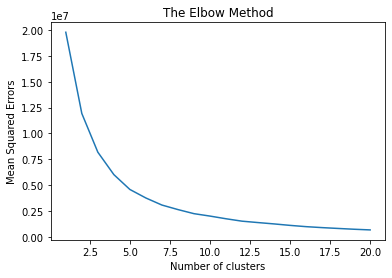

<Figure size 720x576 with 0 Axes>

In [11]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(data_comp)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Squared Errors')
plt.figure(figsize=(10,8))
plt.show()

Optimum number of cluster from the elbow method is determined to be 5 ,so 5 clusters show stocks  similar  in performance

# 2.

In [12]:
df_comp = pd.DataFrame(pca.components_,columns=data.columns)
df_comp.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.064116,-0.061006,-0.039128,-0.040896,-0.062662,-0.009756,-0.035746,-0.054455,0.050145,-0.035261,...,-0.049236,0.056778,-0.054394,-0.050423,0.046987,-0.057669,-0.061151,-0.062229,0.002498,-0.051497
1,0.013460,-0.017836,-0.064281,0.033885,0.001886,-0.032434,0.043464,-0.029479,0.016120,0.058259,...,-0.058924,0.030252,0.013685,-0.040764,-0.052832,0.010248,0.031474,-0.020367,-0.081247,-0.059452
2,0.000257,-0.013690,-0.039765,0.064156,0.012142,0.043281,-0.037260,0.040575,-0.053959,-0.051098,...,-0.003135,0.022023,0.059652,-0.034497,-0.028736,-0.038999,-0.004302,0.021093,-0.066302,0.023674
3,-0.000057,0.011872,0.007578,0.077207,0.008521,-0.027793,-0.017217,0.009008,-0.032168,0.034345,...,0.021719,0.060973,-0.039576,0.027646,0.012222,-0.039697,0.002869,-0.002750,-0.049440,0.015092
4,0.015223,-0.054586,-0.032856,-0.016822,0.002549,-0.038383,-0.101752,-0.034551,-0.011474,0.037572,...,-0.036346,-0.011499,-0.030356,-0.011622,-0.045632,0.029278,-0.002911,-0.001172,-0.003602,0.005618


# 3

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
label=kmeans.fit_predict(data_comp)


In [14]:
data_comp['labels']=label

In [15]:
data_comp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,labels
0,25.647154,9.991542,-9.398347,-2.970993,-1.536428,-1.842704,-0.771186,-3.946011,4.124103,1.622701,1.450464,-0.583932,-2.721408,0.279053,-1.735397,3
1,25.744480,9.878093,-9.818745,-2.560079,-1.475362,-2.027779,-0.885051,-3.926365,3.947790,1.549112,1.552032,-0.574230,-3.016770,0.141797,-1.888637,3
2,25.661695,9.811347,-9.691514,-2.861155,-1.569331,-1.943936,-0.822287,-4.012280,3.964181,1.654823,1.667133,-0.678520,-2.920484,0.164659,-1.865079,3
3,25.764126,9.979938,-9.190003,-3.048149,-1.438223,-2.032644,-0.723271,-4.040956,3.971900,1.743432,1.703716,-0.649244,-2.793350,0.175126,-1.669309,3
4,25.675520,9.863466,-9.528972,-2.844228,-1.365800,-2.039618,-0.817638,-4.228472,3.990316,1.684700,1.792641,-0.704489,-2.869207,0.111366,-1.691537,3


In [16]:
a=data_comp['labels'].unique().tolist()
a

[3, 4, 1, 0, 2]

In [31]:
item_counts = data_comp["labels"].value_counts()
item_counts

1    8999
0    8913
2    8887
4    7820
3    6647
Name: labels, dtype: int64

In [34]:
counts=item_counts.tolist()
labelnames=item_counts.index

In [36]:
for i in range(len(counts)):
    print(f'For lablel {labelnames[i]} the number of similar stock performances is:{counts[i]}')


For lablel 1 the number of similar stock performances is:8999
For lablel 0 the number of similar stock performances is:8913
For lablel 2 the number of similar stock performances is:8887
For lablel 4 the number of similar stock performances is:7820
For lablel 3 the number of similar stock performances is:6647
